## Red Wine Quality

```redwine-quality.ipynb```

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./winequality-red.csv')

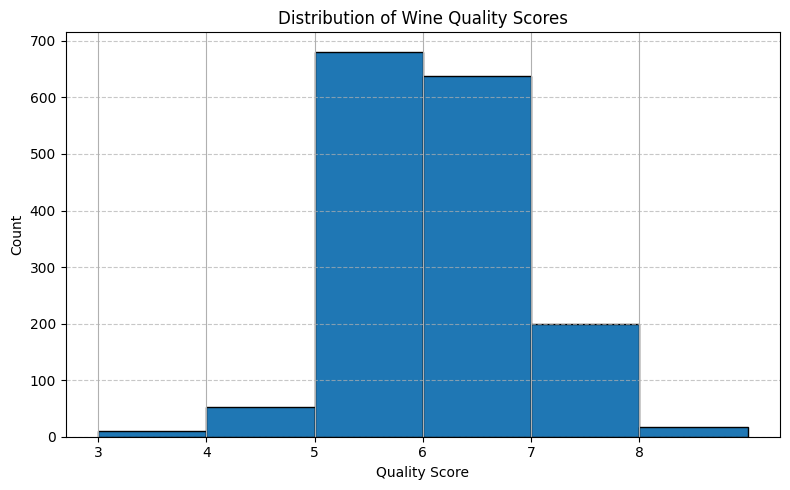

In [9]:
# 특성 살펴보기 (품질 분포, 히스토그램)

# 품질(quality) 칼럼 분포 시각화
plt.figure(figsize=(8, 5))
df['quality'].hist(
    bins=range(int(df['quality'].min()), int(df['quality'].max()) + 2),
    edgecolor='black'
)

# 3. 그래프 꾸미기
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.xticks(range(int(df['quality'].min()), int(df['quality'].max()) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 4. 결과 출력
plt.show()

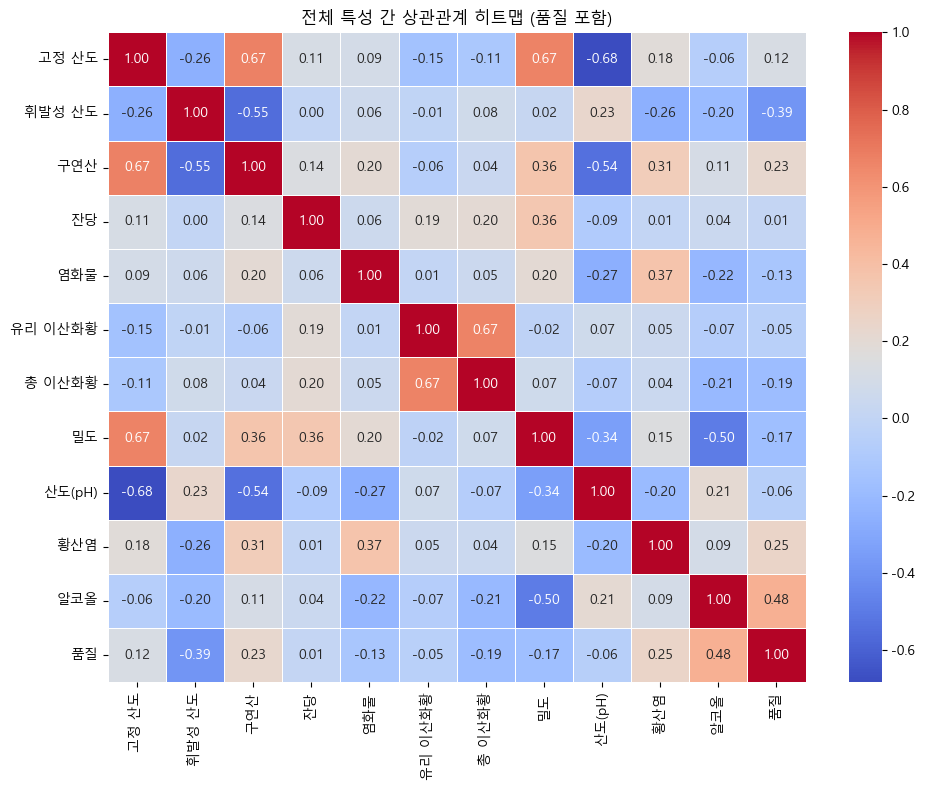

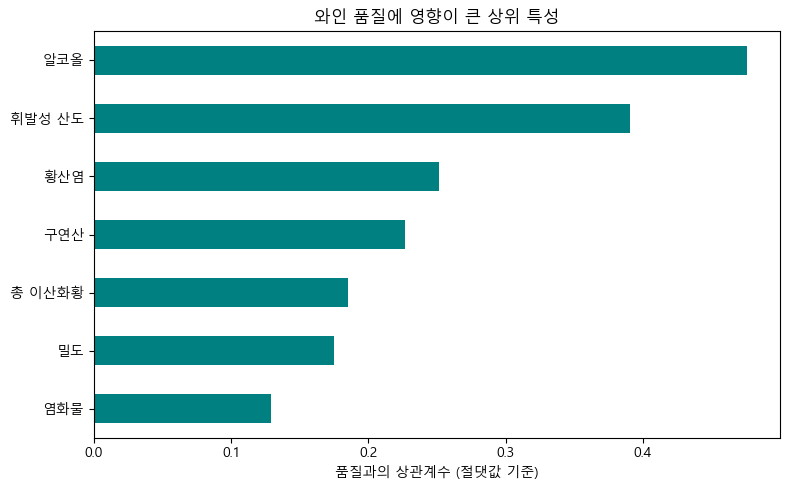

In [11]:
# 품질과의 상관관계 (히트맵) / 품질에 영향을 많이 주는 특성들 시각화

# 1. 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df = pd.read_csv('./winequality-red.csv')

# 3. 컬럼명 한글로 변환
col_name_map = {
    'fixed acidity': '고정 산도',
    'volatile acidity': '휘발성 산도',
    'citric acid': '구연산',
    'residual sugar': '잔당',
    'chlorides': '염화물',
    'free sulfur dioxide': '유리 이산화황',
    'total sulfur dioxide': '총 이산화황',
    'density': '밀도',
    'pH': '산도(pH)',
    'sulphates': '황산염',
    'alcohol': '알코올',
    'quality': '품질'
}
df.rename(columns=col_name_map, inplace=True)

# 4. 상관계수 계산 및 히트맵
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("전체 특성 간 상관관계 히트맵 (품질 포함)")
plt.tight_layout()
plt.show()

# 5. 품질에 영향을 주는 상위 특성 시각화
quality_corr = correlation['품질'].drop('품질')
top_features = quality_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
top_features.head(7).sort_values().plot(kind='barh', color='teal')
plt.title("와인 품질에 영향이 큰 상위 특성")
plt.xlabel("품질과의 상관계수 (절댓값 기준)")
plt.tight_layout()
plt.show()

In [22]:
# 훈련 테스트 셋 나누기

from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('./winequality-red.csv')
X = df.drop('quality', axis=1)
y = df['quality']

# 80% 학습 / 20% 테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"훈련 샘플 수: {len(X_train)}개")
print(f"테스트 샘플 수: {len(X_test)}개")

훈련 샘플 수: 1199개
테스트 샘플 수: 400개


📈 MAE (평균 절대 오차): 0.5056
📉 RMSE (평균 제곱근 오차): 0.6595
🔍 R² Score (설명력): 0.3346


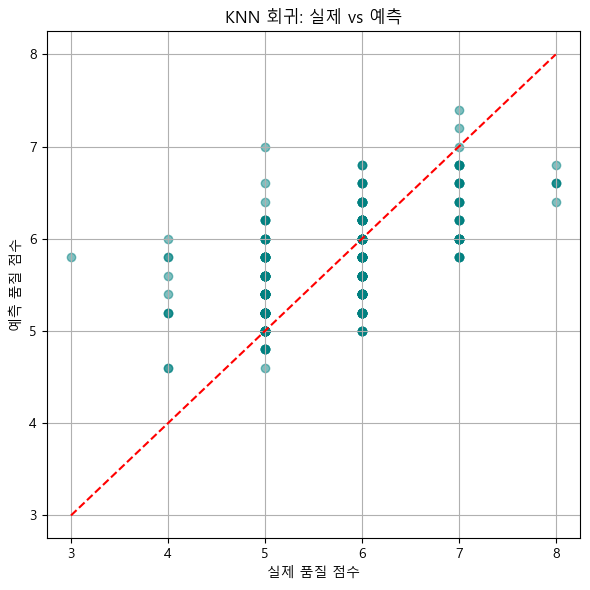

In [23]:
# KNN 회귀로 와인 품질 예측

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import platform

# 1. 한글 폰트 설정 (그래프용, 선택사항)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df = pd.read_csv('./winequality-red.csv')

# 3. 입력/타겟 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 4. 훈련/테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 스케일링 (KNN은 거리 기반이므로 표준화 필수)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. KNN 회귀 모델 정의 및 학습
knn = KNeighborsRegressor(n_neighbors=5)  # k=5
knn.fit(X_train_scaled, y_train)

# 7. 예측 및 성능 평가
y_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ← 여기 수정!
r2 = r2_score(y_test, y_pred)

print(f"📈 MAE (평균 절대 오차): {mae:.4f}")
print(f"📉 RMSE (평균 제곱근 오차): {rmse:.4f}")
print(f"🔍 R² Score (설명력): {r2:.4f}")

# 8. 실제값 vs 예측값 시각화
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 기준선
plt.xlabel("실제 품질 점수")
plt.ylabel("예측 품질 점수")
plt.title("KNN 회귀: 실제 vs 예측")
plt.grid(True)
plt.tight_layout()
plt.show()


[훈련셋]
📈 MAE: 0.4996
📉 RMSE: 0.6513
🔍 R²: 0.3480

[테스트셋]
📈 MAE: 0.5035
📉 RMSE: 0.6245
🔍 R²: 0.4032


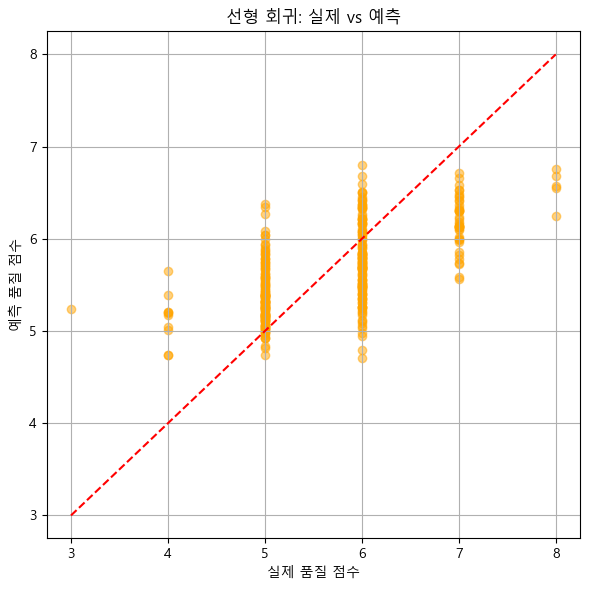

In [ ]:
# 선형회귀로 와인 품질 예측 (훈련셋 / 테스트셋의 점수를 높여보자)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import platform

# 1. 한글 폰트 설정 (선택)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df = pd.read_csv('./winequality-red.csv')

# 3. 입력(X), 타겟(y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 4. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 표준화 (선형 회귀는 스케일 민감하므로 필수!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 선형 회귀 모델 학습
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 7. 예측 및 평가
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# 8. 평가 지표 출력
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n[{dataset_name}]")
    print(f"📈 MAE: {mae:.4f}")
    print(f"📉 RMSE: {rmse:.4f}")
    print(f"🔍 R²: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "훈련셋")
evaluate_model(y_test, y_test_pred, "테스트셋")

# 9. 시각화: 실제 vs 예측 (테스트셋)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("실제 품질 점수")
plt.ylabel("예측 품질 점수")
plt.title("선형 회귀: 실제 vs 예측")
plt.grid(True)
plt.tight_layout()
plt.show()


📌 [Ridge 회귀 (L2 정규화)]
MAE: 0.5036
RMSE: 0.6245
R²: 0.4032

📌 [Lasso 회귀 (L1 정규화)]
MAE: 0.5497
RMSE: 0.6627
R²: 0.3279


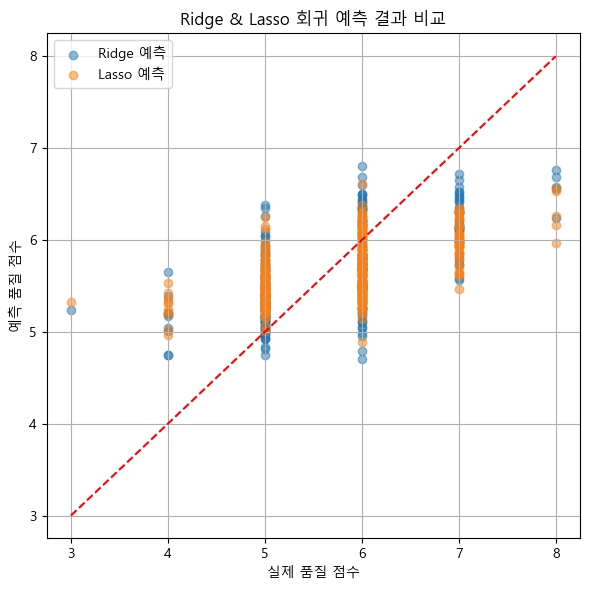

In [19]:
# Ridge, Lasso 로 규제해가며 예측 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import platform

# 1. 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df = pd.read_csv('./winequality-red.csv')

# 3. 입력/타겟 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 4. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 모델 정의 (Ridge & Lasso)
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# 7. 예측
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

# 8. 평가 함수
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 [{name}]")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

# 9. 모델 평가
evaluate_model("Ridge 회귀 (L2 정규화)", y_test, ridge_pred)
evaluate_model("Lasso 회귀 (L1 정규화)", y_test, lasso_pred)

# 10. 시각화: 실제 vs 예측 (비교)
plt.figure(figsize=(6,6))
plt.scatter(y_test, ridge_pred, label="Ridge 예측", alpha=0.5)
plt.scatter(y_test, lasso_pred, label="Lasso 예측", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("실제 품질 점수")
plt.ylabel("예측 품질 점수")
plt.title("Ridge & Lasso 회귀 예측 결과 비교")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()